In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json
import pandas as pd
import os

In [2]:
basepath = '../exp-logs/CIFAR10/'


results = []
init_scales = [1,5,9]
seeds = list(range(1,3))
weight_decays = [0, 1e-4, 1e-3, 1e-2, 1e-1]
dataset_names = ["CIFAR10"]
train_points = [1000]
for tp in train_points:
  for init_scale in init_scales:
    for wd in weight_decays:
      for seed in seeds:
        #path = basepath + f"init-scale_{init_scale}_weight-decay_{wd}_seed_{seed}"
        path = basepath + f"dnn_init-scale_{init_scale}_weight-decay_{wd}_train-points_{tp}_seed_{seed}"
        if len(os.listdir(path)) > 3: # is there a '2' there? (i.e. did another exp run?)
          print(path, os.listdir(path))
        with open(path + "/1/info.json") as f:
          with open(path + "/1/config.json") as g:
            results.append({'config': json.load(g), 'info': json.load(f)})

In [3]:
# config : weight decay, init scale
# data: train_acc, val_acc, train_loss, val_loss
# unpack results into dataframe
data = {'log_steps': [], 'train_acc': [], 'val_acc': [], 'train_loss': [], 'val_loss': [], 'weight_decay': [], 'init_scale': [], 'seed': []}
for i,r in enumerate(results):
  steps = r["info"]["log_steps"]
  data["log_steps"].extend(steps)
  data['train_acc'].extend(r["info"]["train"]["accuracy"])
  data['val_acc'].extend(r["info"]["val"]["accuracy"])
  data['train_loss'].extend(r["info"]["train"]["loss"])
  data['val_loss'].extend(r["info"]["val"]["loss"])
  data['weight_decay'].extend([r["config"]["weight_decay"]]*len(steps))
  data['init_scale'].extend([r["config"]["initialization_scale"]]*len(steps))
  data['seed'].extend([r["config"]["seed"]]*len(steps))

data = pd.DataFrame(data)

# Varying initialization_scale

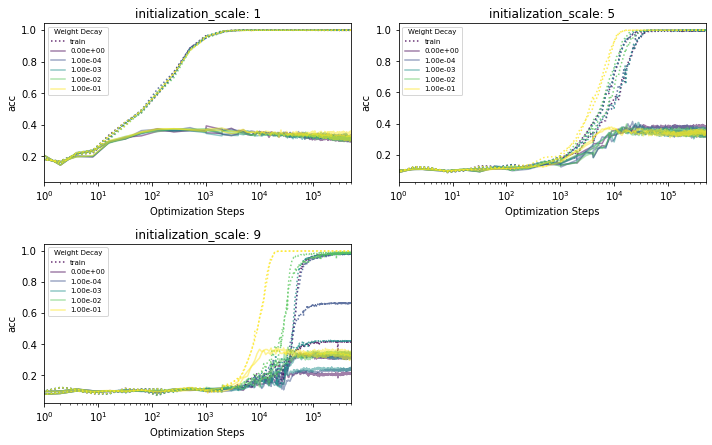

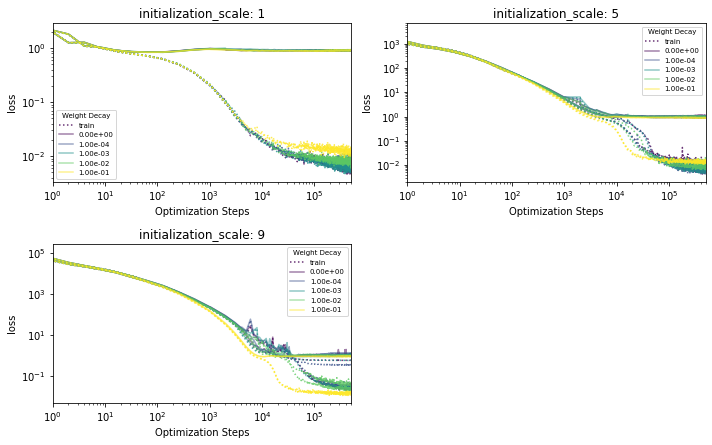

In [5]:
for metric in ["acc", "loss"]:
  plt.figure(figsize=(10, 15))

  for l, scale in enumerate(init_scales):
      plt.subplot(5, 2, l+1)

      colors = plt.cm.viridis(np.linspace(0, 1, len(weight_decays)))
      for i, weight_decay in enumerate(weight_decays):
        for j, seed in enumerate(seeds):
          data_sel = data[(data['weight_decay'] == weight_decay) & (data['init_scale'] == scale) & (data['seed'] == seed)]
          steps = data_sel['log_steps']
          train = data_sel[f'train_{metric}']
          val = data_sel[f'val_{metric}']
          plt.plot(steps, train, color=colors[i], alpha=.8, linestyle='dotted', label='train' if i == 0 and j == 0 else None)
          plt.plot(steps, val, color=colors[i], alpha=.5, label=f"{weight_decay:1.2e}" if j == 0 else None)


      plt.xscale('log')
      plt.xlim(1, 5e5)
      plt.xlabel("Optimization Steps")

      if metric == "loss":
        plt.yscale('log')
      plt.ylabel(metric)

      plt.title(f"initialization_scale: {scale}")
      legend = plt.legend(prop={'size': 7}, loc='best', title="Weight Decay")
      plt.setp(legend.get_title(), fontsize=7)

  plt.tight_layout()
  plt.savefig(f'figures/different-initialization-scales_{metric}.pdf')


# varying train_data

In [ ]:
collection = get_collection('mnist-mlp-3')

In [ ]:
fields = ['config']
query = {} # pull all experiments
results = list(collection.find(query, fields))

In [ ]:
initialization_scale = results[0]['config']['initialization_scale']
weight_decays = sorted(list({r['config']['weight_decay'] for r in results}))
train_pointses = sorted(list({r['config']['train_points'] for r in results}))

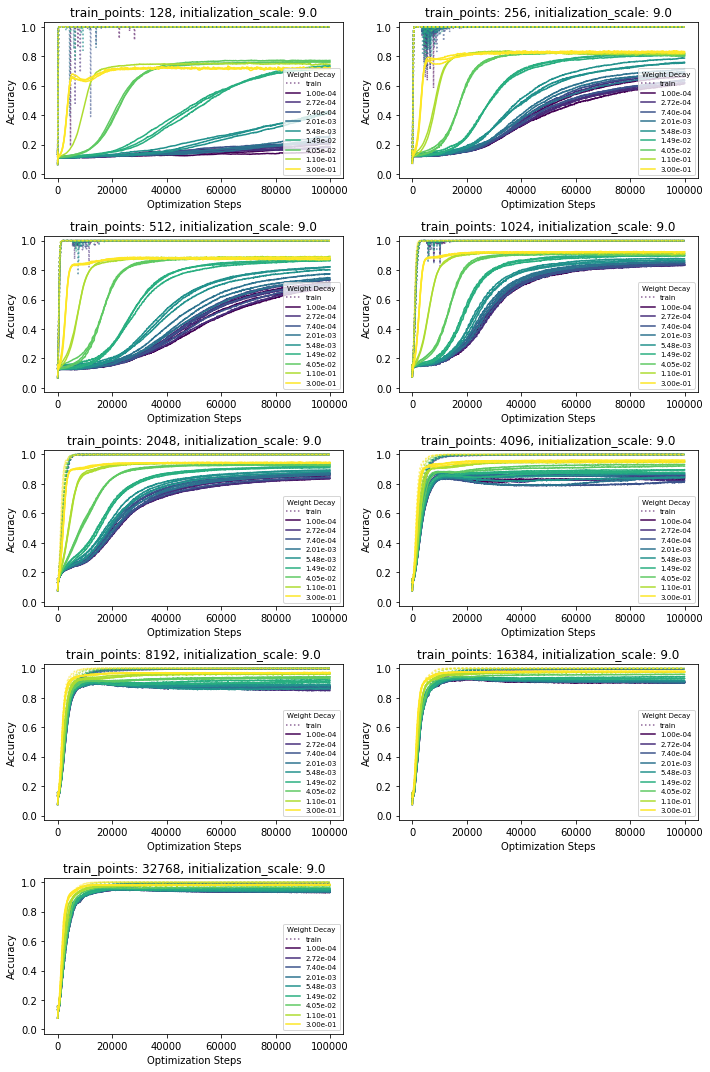

In [ ]:
plt.figure(figsize=(10, 15))

for l, train_points in enumerate(train_pointses):
    
    plt.subplot(5, 2, l+1)
    
    colors = plt.cm.viridis(np.linspace(0, 1, len(weight_decays)))
    for i, weight_decay in enumerate(weight_decays):
        fields = ['config', 'info']
        query = {
            'status': 'COMPLETED',
            'config.weight_decay': weight_decay,
            'config.train_points': train_points
            
        }
        results = list(collection.find(query, fields))
        if results:
            for j, r in enumerate(results):
                if r['info']:

                    steps = r['info']['log_steps']
                    train = r['info']['train']['accuracy']
                    val = r['info']['val']['accuracy']
        #             plt.plot(steps, train, color='red')
                    plt.plot(steps, train[:len(steps)], color=colors[i], alpha=0.6, linestyle='dotted', label='train' if i == 0 and j == 0 else None)
                    plt.plot(steps, val, color=colors[i], label="{:1.2e}".format(weight_decay) if j == 0 else None)


#     plt.xscale('log')
    plt.xlabel("Optimization Steps")

    plt.ylim(-0.03, 1.03)
    plt.ylabel("Accuracy")

    plt.title(f"train_points: {train_points}, initialization_scale: {initialization_scale}")
    legend = plt.legend(prop={'size': 7}, loc='lower right', title="Weight Decay")
    plt.setp(legend.get_title(), fontsize=7)

plt.tight_layout()
plt.savefig('figures/different-train-points.pdf')


# more data, varying initialization_scale

In [ ]:
collection = get_collection('mnist-mlp-4')

In [ ]:
fields = ['config', 'info']
query = {'status': 'COMPLETED'} # pull all experiments
results = list(collection.find(query, fields))

In [ ]:
train_points = results[0]['config']['train_points']
initialization_scale = results[0]['config']['initialization_scale']
weight_decays = sorted(list({r['config']['weight_decay'] for r in results}))
initialization_scales = sorted(list({r['config']['initialization_scale'] for r in results}))

In [ ]:
initialization_scales

[1.0,
 3.0714285714285716,
 5.142857142857143,
 7.214285714285715,
 9.285714285714286,
 11.357142857142858,
 13.42857142857143,
 15.500000000000002,
 17.571428571428573,
 19.642857142857146,
 21.714285714285715,
 23.78571428571429,
 25.85714285714286,
 27.92857142857143,
 30.0]

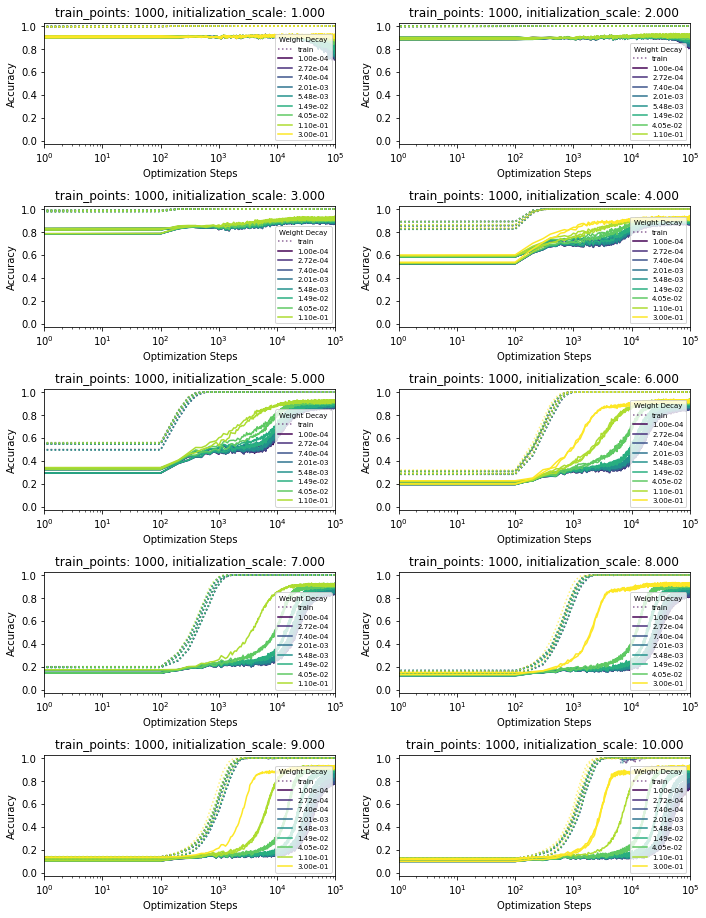

In [15]:
plt.figure(figsize=(10, 20))

for l, scale in enumerate(initialization_scales):
    
    plt.subplot(8, 2, l+1)
    
    colors = plt.cm.viridis(np.linspace(0, 1, len(weight_decays)))
    for i, weight_decay in enumerate(weight_decays):
        fields = ['config', 'info']
        query = {
            'status': 'COMPLETED',
            'config.weight_decay': weight_decay,
            'config.initialization_scale': scale
            
        }
        results = list(collection.find(query, fields))
        if results:
            for j, r in enumerate(results):
                if r['info']:

                    steps = r['info']['log_steps']
                    train = r['info']['train']['accuracy']
                    val = r['info']['val']['accuracy']
        #             plt.plot(steps, train, color='red')
                    plt.plot(steps, train[:len(steps)], color=colors[i], alpha=0.6, linestyle='dotted', label='train' if i == 0 and j == 0 else None)
                    plt.plot(steps, val, color=colors[i], label="{:1.2e}".format(weight_decay) if j == 0 else None)


    plt.xscale('log')
    plt.xlim(1, 1e5)
    plt.xlabel("Optimization Steps")

    plt.ylim(-0.03, 1.03)
    plt.ylabel("Accuracy")

    plt.title(f"train_points: {train_points}, initialization_scale: {scale:.3f}")
    legend = plt.legend(prop={'size': 7}, loc='lower right', title="Weight Decay")
    plt.setp(legend.get_title(), fontsize=7)

plt.tight_layout()
plt.savefig('figures/different-initialization-scales-more-data.pdf')


In [11]:
results[0]['config']

{'train_points': 1000,
 'optimization_steps': 100000,
 'batch_size': 200,
 'loss_function': 'MSE',
 'optimizer': 'AdamW',
 'weight_decay': 0.29999999999999993,
 'lr': 0.001,
 'initialization_scale': 10.0,
 'download_directory': 'om/user/ericjm/Downloads/',
 'depth': 3,
 'width': 200,
 'activation': 'ReLU',
 'log_freq': 100,
 'verbose': False,
 'device': {'py/reduce': [{'py/type': 'torch.device'},
   {'py/tuple': ['cuda', 0]}]},
 'dtype': {'py/object': 'torch.dtype'},
 'overwrite': 268,
 'db_collection': 'mnist-mlp-2',
 'seed': 0}

In [ ]:
fracs = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
colors = plt.cm.viridis(np.linspace(0, 1, len(fracs)))
for i, frac in enumerate(fracs):
    fields = ['config', 'info']
    query = {
#         'status': 'RUNNING',
        'config.training_data_fraction': frac,
    }
    results = list(collection.find(query, fields))
    if results:
        for j, r in enumerate(results):
            steps = r['info']['log_steps']
            train = r['info']['/']['train']['accuracy']
            val = r['info']['/']['val']['accuracy']

#             plt.plot(steps, train, color='red')
            plt.plot(steps, val, color=colors[i], label=frac if j == 0 else None)
plt.legend()

ax = plt.subplot(1, 1, 1)

fracs = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
colors = plt.cm.viridis(np.linspace(0, 1, len(fracs)))
for i, frac in tqdm(enumerate(fracs)):
    fields = ['config', 'info']
    query = {
#         'status': 'RUNNING',
        'config.training_data_fraction': frac,
    }
    results = list(collection.find(query, fields))
    results = [r for r in results if r['info']['log_steps'][-1] > 200000]
    if results:
        shortest_run = min(range(len(results)), key=lambda k: len(results[k]['info']['log_steps']))
        l = len(results[shortest_run]['info']['log_steps'])
        steps = results[shortest_run]['info']['log_steps']
        trains = np.array([results[k]['info']['/']['train']['accuracy'][:l] for k in range(len(results))])
        vals = np.array([results[k]['info']['/']['val']['accuracy'][:l] for k in range(len(results))])
        train_means = np.mean(trains, axis=0)
        train_stds = np.std(trains, axis=0)
        val_means = np.mean(vals, axis=0)
        val_stds = np.std(vals, axis=0)
        
        
        
#         steps = []
#         train_means = []
#         train_stds = []
#         val_means = []
#         val_stds = []
#         j = 0
        
        
        
#         while all(len(results[k]['info']['log_steps']) > j for k in range(len(results))):
#             steps.append(j)
#             train_means.append(np.mean([results[k]['info']['/']['train']['accuracy'][j] for k in range(len(results))]))
#             train_stds.append(np.std([results[k]['info']['/']['train']['accuracy'][j] for k in range(len(results))]))
#             val_means.append(np.mean([results[k]['info']['/']['val']['accuracy'][j] for k in range(len(results))]))
#             val_stds.append(np.std([results[k]['info']['/']['val']['accuracy'][j] for k in range(len(results))]))
        
#         train_means = np.array(train_means)
#         train_stds = np.array(train_stds)
#         val_means = np.array(val_means)
#         val_stds = np.array(val_stds)
        plt.plot(steps, val_means, color=colors[i], label=frac)
        plt.fill_between(steps, val_means-val_stds, val_means+val_stds, color=colors[i], alpha=0.3)

plt.ylim(-0.02, 1.05)
plt.xlim(100, 1000000)
plt.xscale('log')
# ax.ticklabel_format(axis='x', style='scientific')
legend = plt.legend(prop={'size': 9}, loc='upper left', title="train data\nfraction")
plt.setp(legend.get_title(), fontsize='9')




In [ ]:
with open("../results/2/info.json", 'r') as f:
    info = json.load(f)
with open("../results/2/config.json", 'r') as f:
    config = json.load(f)

In [ ]:
steps = info['log_steps']
train_accuracies = info['train']['accuracy']
val_accuracies = info['val']['accuracy']

plt.plot(steps, train_accuracies, color='red', label='train')
plt.plot(steps, val_accuracies, color='green', label='val')
plt.xlabel("Optimization Steps")
plt.ylabel("Accuracy")
plt.title(f"MNIST:\ntrain_points: {config['train_points']}\ninitialization_scale: {config['initialization_scale']}\nweight_decay: {config['weight_decay']}")

plt.legend()